## Import the necessary library


In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Method to plot the progress of the agent's score

In [3]:
def plot_result(scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## Validation method
The noise has to be deactivated before the validation. This method is being used to assess the performance of the agent after every episode of training

In [4]:
def validate(agent, max_t, train_mode=True):
    env_info = env.reset(train_mode=train_mode)[brain_name]
    states = env_info.vector_observations
    scores_one_episode = np.zeros(states.shape[0])
    for t in range(max_t):
        actions, _, _ = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(np.clip(actions, -1, 1))[brain_name]   # send all actions to the environment
        next_states = env_info.vector_observations               # get next state (for each agent)
        rewards = env_info.rewards                               # get reward (for each agent)
        dones = env_info.local_done                              # see if episode finished
        scores_one_episode += env_info.rewards                   # update the score (for each agent)
        states = next_states                                     # roll over states to next time step
        if np.any(dones):                                        # exit loop if episode finished
            break
    return scores_one_episode

## Training method
The main loop of the training can be found here

In [11]:
def train(agent, n_episodes=500, max_t=500, train_mode=True):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        states = env_info.vector_observations
        scores_one_episode = np.zeros(states.shape[0])
        trajectories_states, trajectories_actions, trajectories_log_probs, trajectories_values, \
        trajectories_rewards, trajectories_next_states, trajectories_dones = [],[],[],[],[],[],[]
        
        for t in range(max_t):
            actions, log_probs, values = agent.act(states)
            env_info = env.step(np.clip(actions, -1, 1))[brain_name] # send all actions to the environment
            next_states = env_info.vector_observations               # get next state (for each agent)
            rewards = env_info.rewards                               # get reward (for each agent)
            dones = env_info.local_done                              # see if episode finished
            scores_one_episode += rewards
            trajectories_states.append(states)
            trajectories_actions.append(actions)
            trajectories_log_probs.append(log_probs)
            trajectories_values.append(values)
            trajectories_rewards.append(rewards)
            trajectories_next_states.append(next_states)
            trajectories_dones.append(dones)
            states = next_states                                     # roll over states to next time step
            if np.any(dones):                                        # exit loop if episode finished
                break
#                 env_info = env.reset(train_mode=train_mode)[brain_name]
#                 states = env_info.vector_observations 
  
        agent.learn(trajectories_states, trajectories_actions, trajectories_log_probs, trajectories_values, 
        trajectories_rewards, trajectories_next_states, trajectories_dones)
        score = np.average(scores_one_episode)
        scores.append(score)
        scores_window.append(score)
        mean_100 = np.mean(scores_window)
        print('\rEpisode {}\tAverage Score: {:.3f}\tLast Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, 
                                                                                          mean_100, 
                                                                                          score,
                                                                                         np.max(scores_one_episode)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, mean_100, np.max(scores_window)))
            agent.save()
        if len(scores_window) >= 100 and np.mean(scores_window)>=max_t*30.0/950:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, mean_100))
            agent.save()
            break
    return scores

Episode 100	Average Score: 0.271	Max Score: 0.6417	Max Score: 1.060
Episode 200	Average Score: 0.555	Max Score: 1.0075	Max Score: 3.760
Episode 300	Average Score: 0.703	Max Score: 1.0277	Max Score: 1.710
Episode 400	Average Score: 0.876	Max Score: 1.2552	Max Score: 1.830
Episode 500	Average Score: 0.971	Max Score: 1.3350	Max Score: 3.600
Episode 600	Average Score: 1.101	Max Score: 1.6750	Max Score: 4.100
Episode 700	Average Score: 1.243	Max Score: 1.8330	Max Score: 4.320
Episode 800	Average Score: 1.372	Max Score: 1.8913	Max Score: 4.210
Episode 900	Average Score: 1.416	Max Score: 1.9264	Max Score: 5.920
Episode 1000	Average Score: 1.542	Max Score: 2.1036	Max Score: 4.620
Episode 1100	Average Score: 1.622	Max Score: 2.1433	Max Score: 3.130
Episode 1200	Average Score: 1.691	Max Score: 2.1756	Max Score: 3.180
Episode 1300	Average Score: 1.742	Max Score: 2.3272	Max Score: 3.510
Episode 1400	Average Score: 1.870	Max Score: 2.3418	Max Score: 5.180
Episode 1500	Average Score: 2.013	Max Score

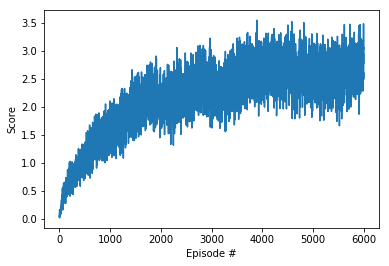

In [12]:
from agents.ppo import PPO
from agents.model_ppo import Gaussian
import random

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
random_seed = 0
states = env_info.vector_observations
action_size = brain.vector_action_space_size
network = Gaussian(states.shape[1], action_size, random_seed).to(device)
agent = PPO(network, random_seed, device, states.shape[0], 
                 LR=3e-4, 
                 GRADIENT_CLIP=1, 
                 EPOCHS=10, 
                 BATCH_SIZE=256,
                GAMMA=0.99,
                GAE_TAU=0.99,
                CLIP_EPSILON=0.1)
scores = train(agent, n_episodes=6000, max_t=256, train_mode=True)
plot_result(scores)

## To Do
The next steps are:
* read the paper on High Dimensional Continuous Control Using Generalized Advantage Estimation from arxiv
* understand the difference between lamda return and the formula based on advantage and residual of bellman equation

In [ ]:
scores = validate(agent, 200, False)
print(np.mean(scores))